<a href="https://colab.research.google.com/github/priyariyyer/AIML_Projects/blob/main/AirlinePassengerFootfallPrediction_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Gathering

In [11]:
import pandas as pd

df = pd.read_csv('/content/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


## Exploratory Data Analysis

In [12]:
df.shape

(145, 2)

In [5]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [6]:
# Intuitive data modifications
df.shape

(145, 1)

In [13]:
# Remove last row which is shown as a total of all months
df = df.drop(144)
df.shape

(144, 2)

In [14]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [15]:
# data quality checks
df.dtypes

,0
Month,object
Thousands of Passengers,float64


In [16]:
df[df['Thousands of Passengers']<0]

,Month,Thousands of Passengers


In [17]:
# Missing data handling
df.isnull().sum()

,0
Month,0
Thousands of Passengers,0


In [18]:
#Change month column's datatype to DateTime
df['Month'] = pd.to_datetime(df['Month'])
df.dtypes

,0
Month,datetime64[ns]
Thousands of Passengers,float64


In [19]:
#set index as Month itself as each month data is unique

df = df.set_index('Month')
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


<Axes: xlabel='Month'>

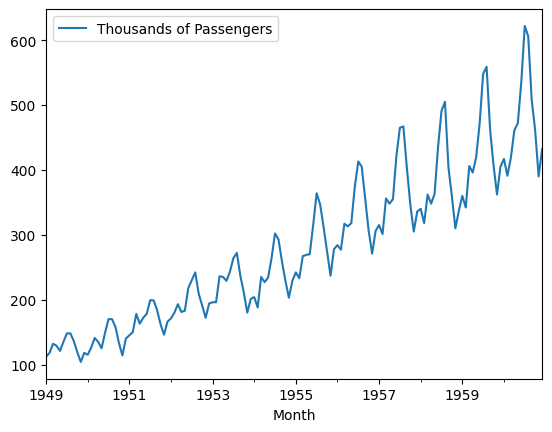

In [20]:
#Plot in charts
df.plot()

In [ ]:
# The data is non-stationary but seasonal as peaks appear on regular interval of 12 months

##Test for Stationarity

In [21]:
#Dickey Fuller Test - used to check the stationarity of data
#test used here is Augumented Dickey Fuller Test
#This is type of Hypothesis testing
from statsmodels.tsa.stattools import adfuller

In [23]:
#create function to check stationarity
def test_stationarity(series):
  result = adfuller(series)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  if result[1] <=0.05: # i.e. there is beyond 95% confidence interval
    print('Reject null hypothesis. Data is stationary')
  else:
    print('Fail to reject null hypothesis. Data is non-stationary')


In [24]:
test_stationarity(df['Thousands of Passengers'])

ADF Statistic: 0.815369
p-value: 0.991880
Fail to reject null hypothesis. Data is non-stationary


In [26]:
#Since data is non-stationary, make it stationary by Differencing
df['Thousands of Passengers'].shift(1) #move/push data from the top by 1 row

,Thousands of Passengers
Month,
1949-01-01,NaN
1949-02-01,112.0
1949-03-01,118.0
1949-04-01,132.0
1949-05-01,129.0
...,...
1960-08-01,622.0
1960-09-01,606.0
1960-10-01,508.0


In [28]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [30]:
#find the difference
df['First Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [31]:
df

,Thousands of Passengers,First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
...,...,...
1960-08-01,606.0,-16.0
1960-09-01,508.0,-98.0
1960-10-01,461.0,-47.0


<Axes: xlabel='Month'>

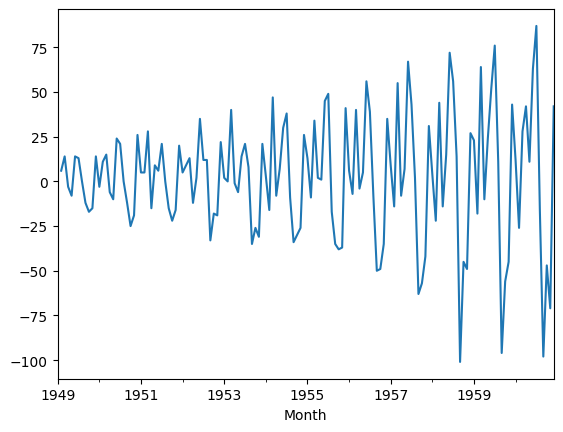

In [32]:
df['First Difference'].plot()

In [33]:
test_stationarity(df['First Difference'].dropna())

ADF Statistic: -2.829267
p-value: 0.054213
Fail to reject null hypothesis. Data is non-stationary


In [36]:
#Differencing again as its still non-stationary
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [37]:
df

,Thousands of Passengers,First Difference,Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
...,...,...,...
1960-08-01,606.0,-16.0,-103.0
1960-09-01,508.0,-98.0,-82.0
1960-10-01,461.0,-47.0,51.0


<Axes: xlabel='Month'>

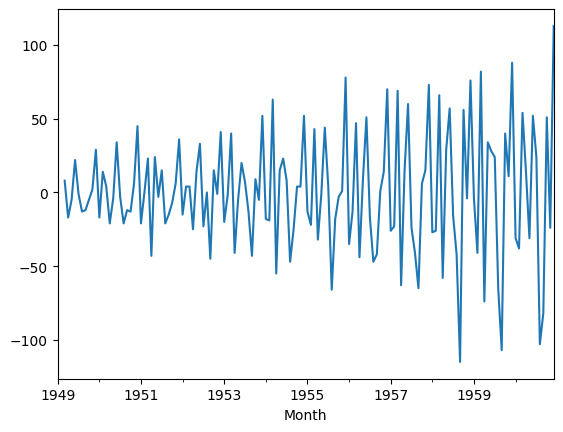

In [38]:
df['Second Difference'].plot()

In [39]:
#check stionarity again
test_stationarity(df['Second Difference'].dropna())

ADF Statistic: -16.384232
p-value: 0.000000
Reject null hypothesis. Data is stationary


In [ ]:
#Hence, value of 'd' parameter = 2

In [40]:
#Since there is seasonality in the data with an interval of 12 months, we can differentiate by 12 months and get closer to 0 difference
#This can be called as Seasonal Difference
df['Seasonal Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [41]:
df

,Thousands of Passengers,First Difference,Second Difference,Seasonal Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


<Axes: xlabel='Month'>

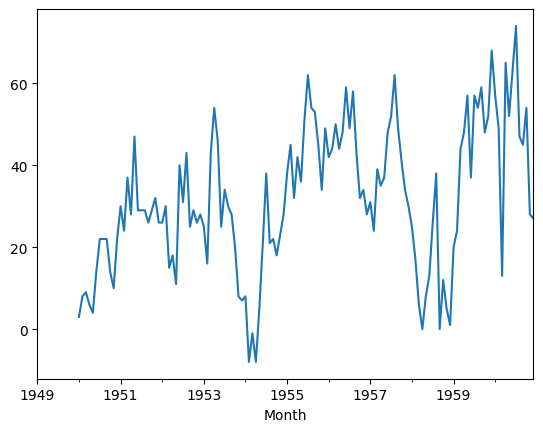

In [42]:
df['Seasonal Difference'].plot()

In [43]:
#test stationarity
test_stationarity(df['Seasonal Difference'].dropna())

ADF Statistic: -3.383021
p-value: 0.011551
Reject null hypothesis. Data is stationary


In [44]:
#Check ACF & PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

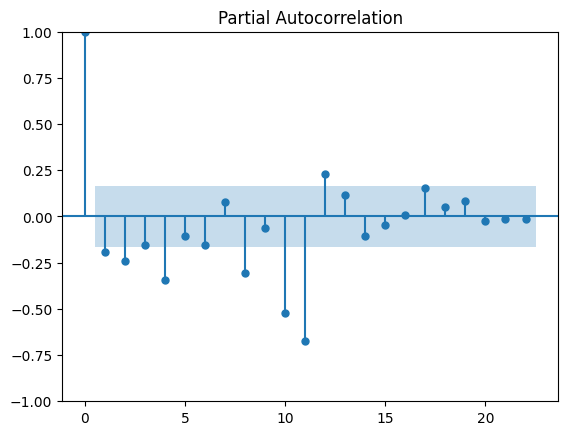

In [45]:
pacf = plot_pacf(df['Second Difference'].dropna())

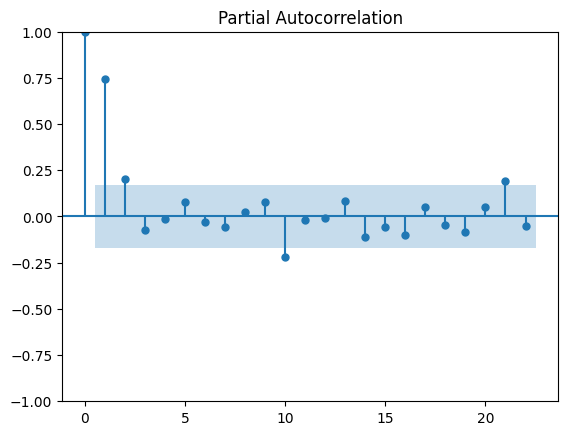

In [46]:
#check pacf for Seasonal Difference
pacf_seasional = plot_pacf(df['Seasonal Difference'].dropna())

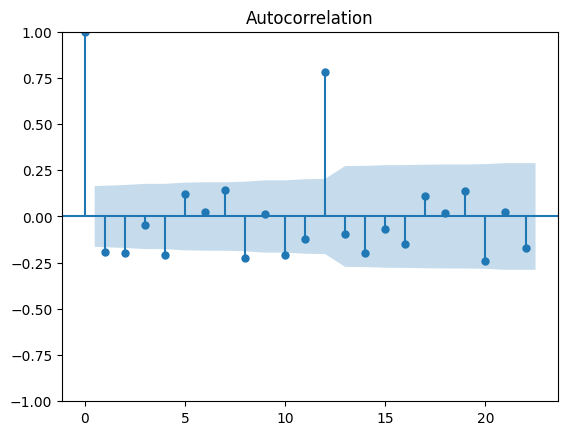

In [49]:
#Check for acf with Differentiated values, where d=2
acf = plot_acf(df['Second Difference'].dropna())

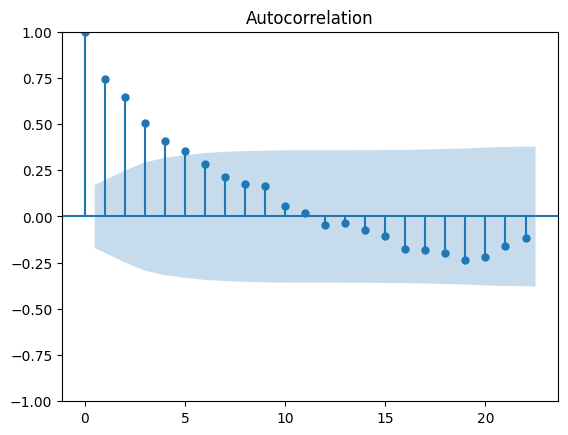

In [48]:
#check acf for Seasonal data
acf_seasonal = plot_acf(df['Seasonal Difference'].dropna())

##Split data into Train and Test data

In [50]:
#split data into 60-40 share of train-test data
#take first 7 years as 60% data of training data
from datetime import datetime, timedelta
train_end_date = datetime(year=1955, month=12, day=1)
test_end_date = datetime(year=1960, month=12, day=1)

In [51]:
train_data = df[:train_end_date]
train_data

,Thousands of Passengers,First Difference,Second Difference,Seasonal Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [52]:
test_data = df[train_end_date + timedelta(days=1):test_end_date]
test_data

,Thousands of Passengers,First Difference,Second Difference,Seasonal Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [53]:
#Since its an Autoregressive Model that will be applied, we do not need to split feature and target variable datasets
#Model itself will do that for each data point

In [54]:
#get the prediction date range from test data
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

##Create Model

In [58]:
#Apply ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(1,2,1)) #value of (p,d,q) = (1,2,1) here

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
model_Arima_fit = model_ARIMA.fit()

In [60]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(1, 2, 1)   Log Likelihood                -367.837
Date:                     Sun, 04 May 2025   AIC                            741.674
Time:                             08:32:41   BIC                            748.894
Sample:                         01-01-1949   HQIC                           744.572
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2214      0.131      1.687      0.092      -0.036       0.479
ma.L1         -0.9996      6.393     -0.156      0.876     -13.530      11.531
sigma2       439.5000   2814.396      0.156      0.876   -5076.614    5955.614
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.05
Prob(Q):                              0.74   Prob(JB):                         0.22
Heteroskedasticity (H):               3.56   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
pred = model_Arima_fit.predict(start=pred_start_date, end=pred_end_date)
pred

,predicted_mean
1956-01-01,288.750764
1956-02-01,292.803067
1956-03-01,295.372047
1956-04-01,297.612557
1956-05-01,299.780330
1956-06-01,301.931995
1956-07-01,304.080094
1956-08-01,306.227403
1956-09-01,308.374537
1956-10-01,310.521632


In [62]:
test_data

,Thousands of Passengers,First Difference,Second Difference,Seasonal Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [63]:
test_data['Predicted_ARIMA'] = pred

<ipython-input-63-90918ede9522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


In [64]:
test_data

,Thousands of Passengers,First Difference,Second Difference,Seasonal Difference,Predicted_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,288.750764
1956-02-01,277.0,-7.0,-13.0,44.0,292.803067
1956-03-01,317.0,40.0,47.0,50.0,295.372047
1956-04-01,313.0,-4.0,-44.0,44.0,297.612557
1956-05-01,318.0,5.0,9.0,48.0,299.780330
1956-06-01,374.0,56.0,51.0,59.0,301.931995
1956-07-01,413.0,39.0,-17.0,49.0,304.080094
1956-08-01,405.0,-8.0,-47.0,58.0,306.227403
1956-09-01,355.0,-50.0,-42.0,43.0,308.374537


<Axes: xlabel='Month'>

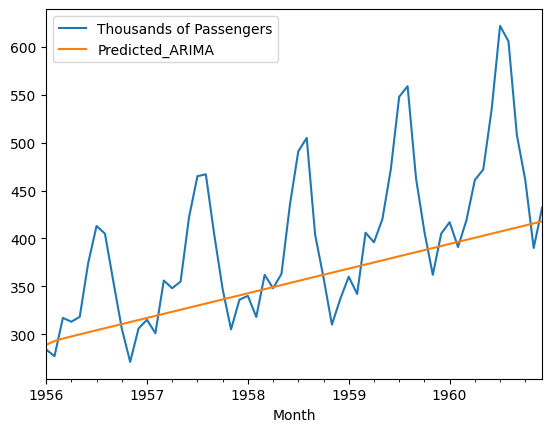

In [65]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [ ]:
#Seasonal data with ARIMA does not show the correct predictions
#Hence check using SARIMA

In [66]:
#Use SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [67]:
model_SARIMAX = SARIMAX(train_data['Thousands of Passengers'], order =(3,0,5), seasonal_order=(0,1,0,12)) #Since seasonality is in the interval of 12 months, s=12 for which d =1

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [68]:
model_SARIMAX_fit = model_SARIMAX.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [69]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sun, 04 May 2025   AIC                            548.480
Time:                                     08:44:40   BIC                            568.970
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5974      0.937      0.637      0.524      -1.240       2.434
ar.L2          0.8310      0.232      3.584      0.000       0.377       1.285
ar.L3         -0.4516      0.893     -0.505      0.613      -2.203       1.299
ma.L1          0.1847      1.167      0.158      0.874      -2.103       2.472
ma.L2         -0.5333      1.265     -0.422      0.673      -3.012       1.945
ma.L3         -0.0988      0.385     -0.256      0.798      -0.854       0.656
ma.L4         -0.1275      0.339     -0.376      0.707      -0.792       0.537
ma.L5          0.2470      0.358      0.691      0.490      -0.454       0.948
sigma2        87.7349     81.586      1.075      0.282     -72.170     247.640
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
#use SARIMAX to predict
pred_SARIMAX = model_SARIMAX_fit.predict(start=pred_start_date, end=pred_end_date)

In [71]:
pred_SARIMAX

,predicted_mean
1956-01-01,286.181873
1956-02-01,281.277139
1956-03-01,309.914607
1956-04-01,310.675373
1956-05-01,311.336104
1956-06-01,354.950526
1956-07-01,403.400398
1956-08-01,385.073462
1956-09-01,349.449217
1956-10-01,310.221952


In [72]:
test_data['Predicted_SARIMAX'] = pred_SARIMAX

<ipython-input-72-5b0cbb3e2b67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMAX'] = pred_SARIMAX


In [73]:
test_data

,Thousands of Passengers,First Difference,Second Difference,Seasonal Difference,Predicted_ARIMA,Predicted_SARIMAX
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,288.750764,286.181873
1956-02-01,277.0,-7.0,-13.0,44.0,292.803067,281.277139
1956-03-01,317.0,40.0,47.0,50.0,295.372047,309.914607
1956-04-01,313.0,-4.0,-44.0,44.0,297.612557,310.675373
1956-05-01,318.0,5.0,9.0,48.0,299.780330,311.336104
1956-06-01,374.0,56.0,51.0,59.0,301.931995,354.950526
1956-07-01,413.0,39.0,-17.0,49.0,304.080094,403.400398
1956-08-01,405.0,-8.0,-47.0,58.0,306.227403,385.073462
1956-09-01,355.0,-50.0,-42.0,43.0,308.374537,349.449217


<Axes: xlabel='Month'>

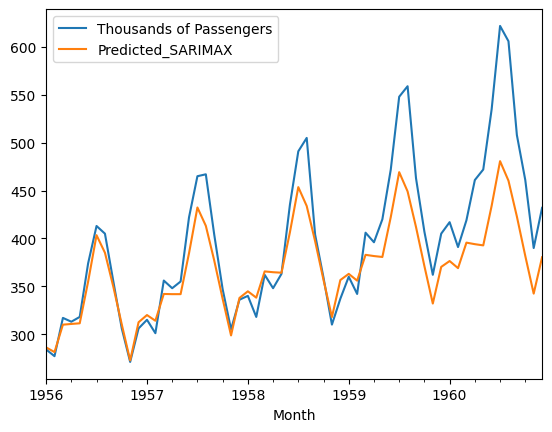

In [74]:
test_data[['Thousands of Passengers','Predicted_SARIMAX']].plot()